# Problem Statement:
## Analyze the heart disease dataset to explore the machine learning algorithms and build a decision tree model to predict the disease.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("HeartDisease.csv")

In [3]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [6]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1c14d623550>,
 [Text(-0.1534669293828939, 1.0892418930548835, 'YES'),
  Text(0.1576524958568545, -1.1189484753777112, 'NO')])

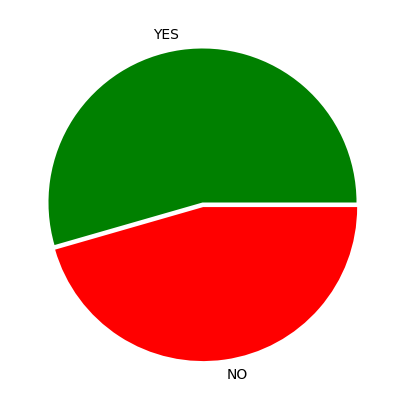

In [7]:
plt.figure(figsize=(5,5))
labels=['YES','NO']
colors=['Green','red']
explode=[0,.03]
x=data['target'].value_counts().values

plt.pie(x,explode,labels,colors)

From the given data we can notice that 54.5% people suffer from heart disease and 45.5% don't have Heart disease

In [8]:
#Lets first analyse the numerical data
data_num=data.select_dtypes(include=np.number)
data_num

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
data_num.drop(['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','slope','ca','target','thalassemia'],axis=1,inplace=True)
data_num.head()

,age,rest_bps,cholestrol,thalach,old_peak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


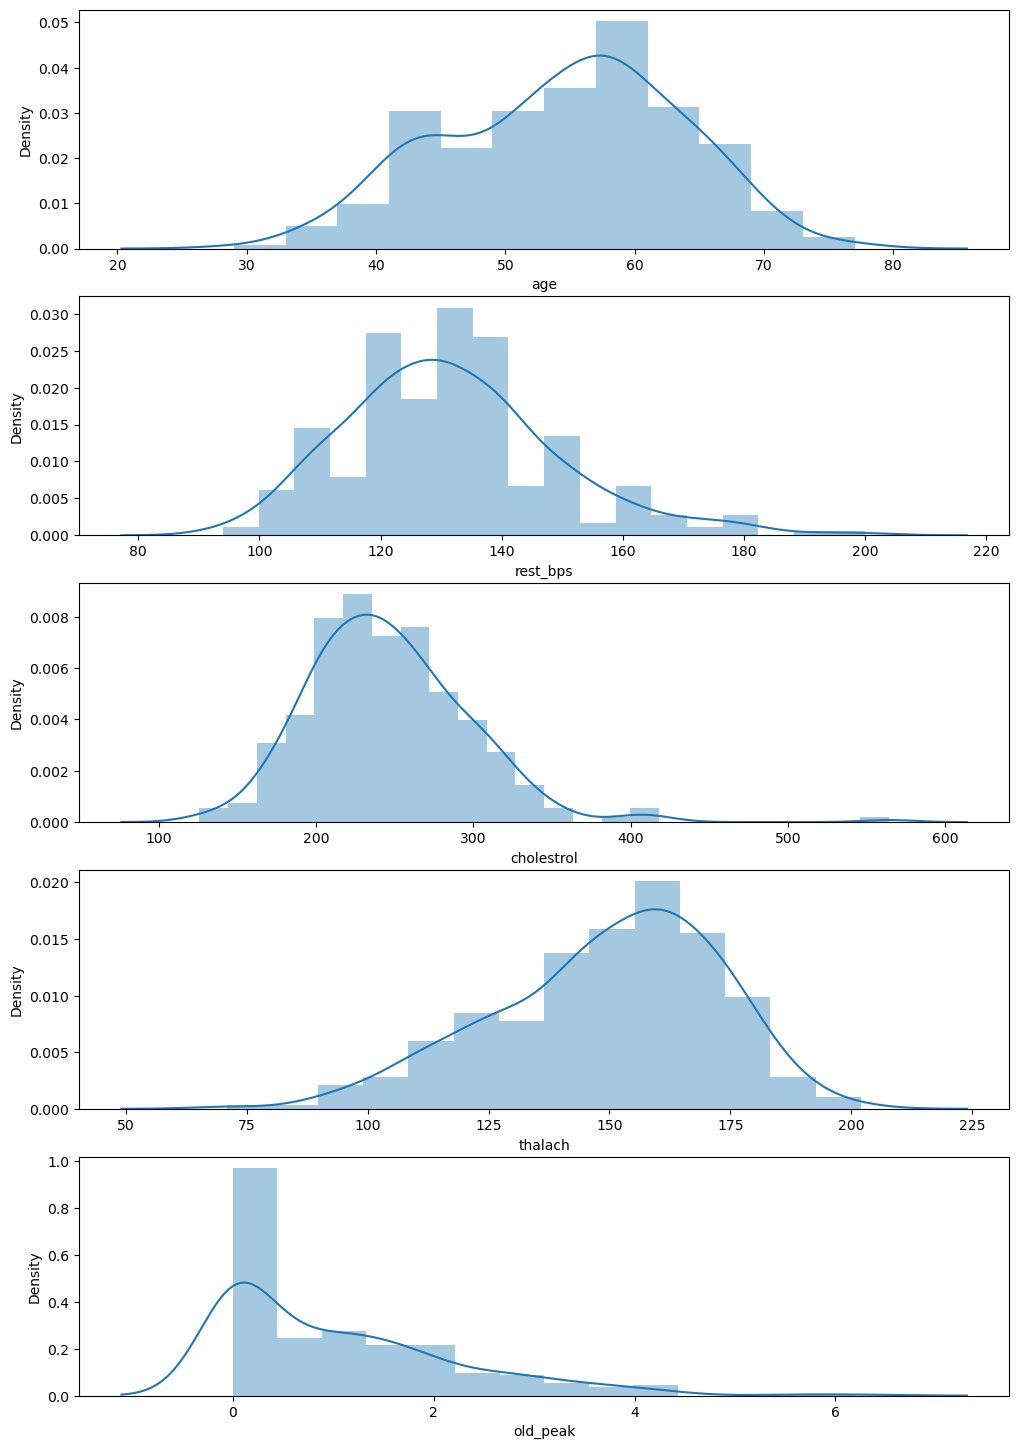

In [10]:
fig,axs=plt.subplots(5,1,figsize=(12,18))
plt1=sns.distplot(data['age'],ax=axs[0])
plt1=sns.distplot(data['rest_bps'],ax=axs[1])
plt1=sns.distplot(data['cholestrol'],ax=axs[2])
plt1=sns.distplot(data['thalach'],ax=axs[3])
plt1=sns.distplot(data['old_peak'],ax=axs[4])

From above graph we can find that many people has blood pressure between 90 to 190 and has high cholestrol from 140 to 360

<Axes: >

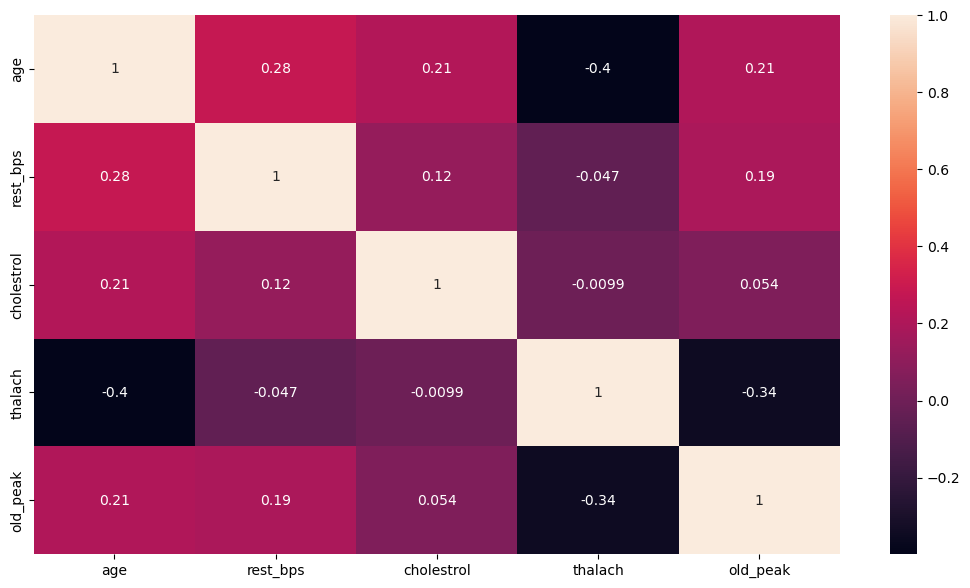

In [11]:
cor=data_num.corr()
plt.figure(figsize=(13, 7))
sns.heatmap(cor,annot=True)

from above graph we can find that bps and cholestrol increases with age because it is corelated with age

### Analyze the catregorical Features

In [12]:
data_cat=data.select_dtypes(include=np.object_)
data_cat.columns

Index([], dtype='object')

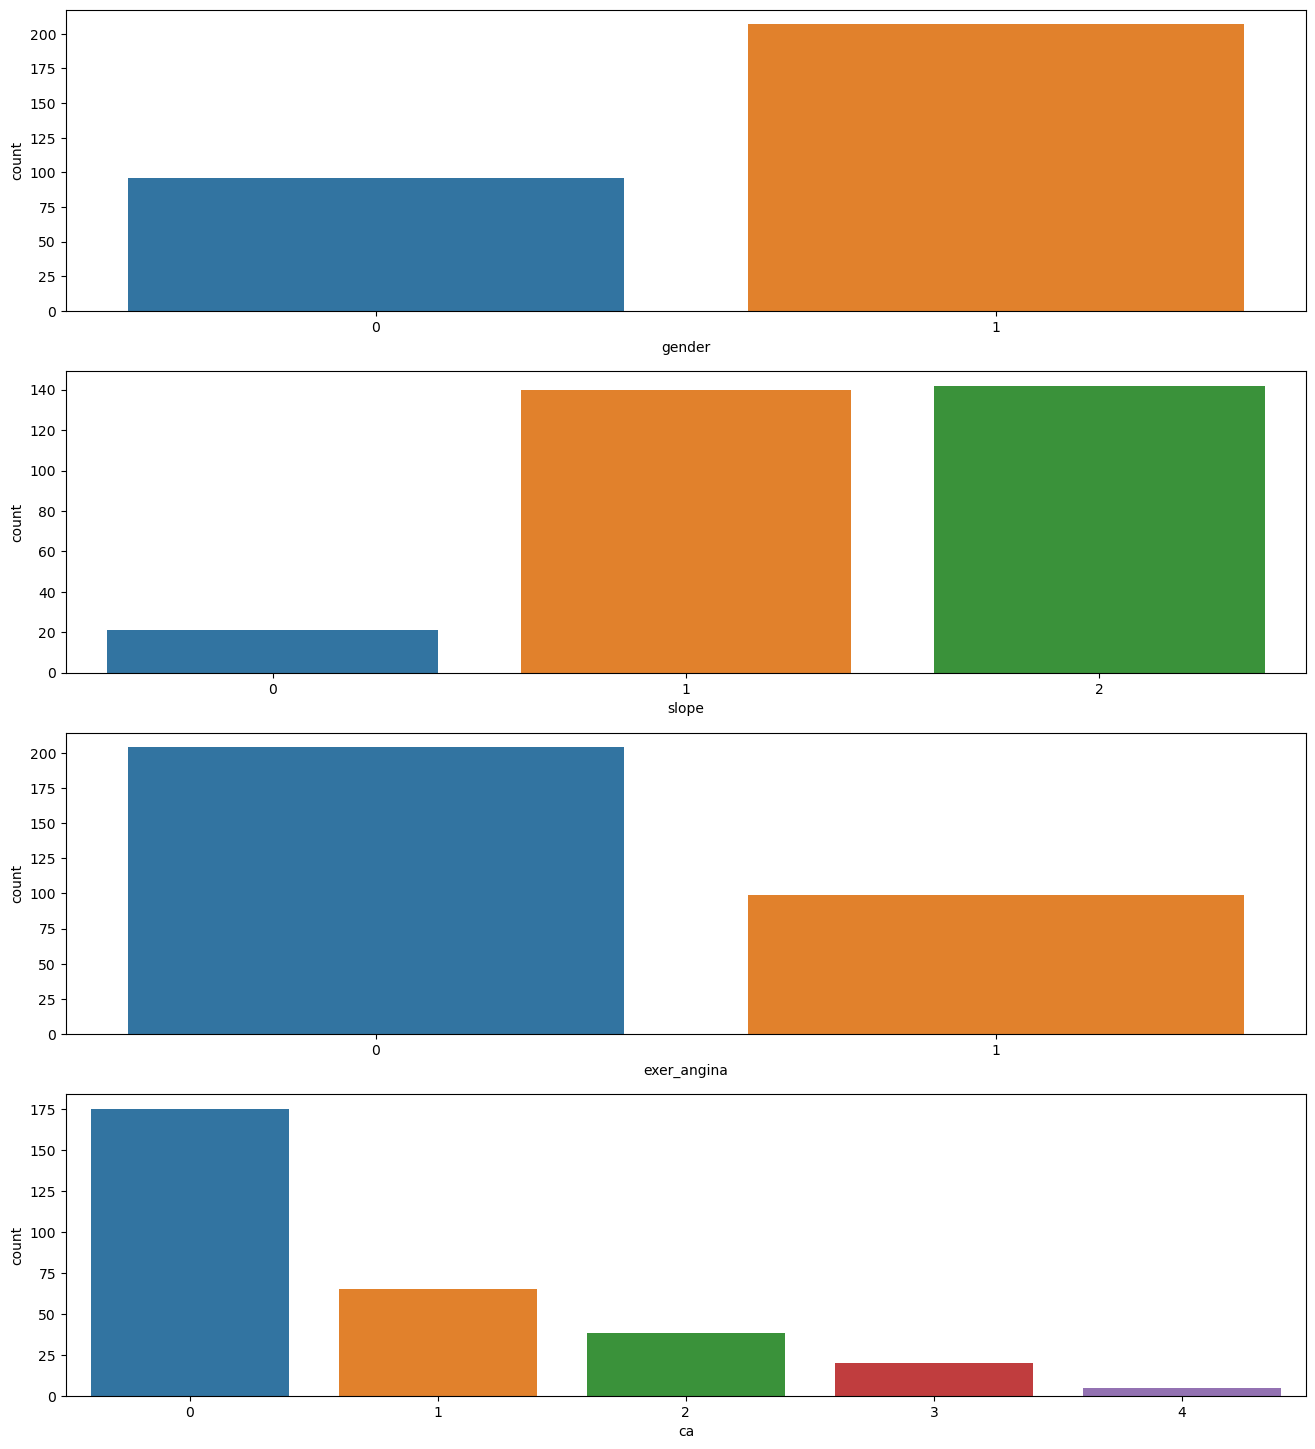

In [13]:
fig,ax=plt.subplots(4,1,figsize=(16,18))
cols=['gender','slope','exer_angina','ca']
for i,val in enumerate(cols):
    sns.countplot(x=val,data=data,ax=ax[i])

<Axes: xlabel='slope', ylabel='count'>

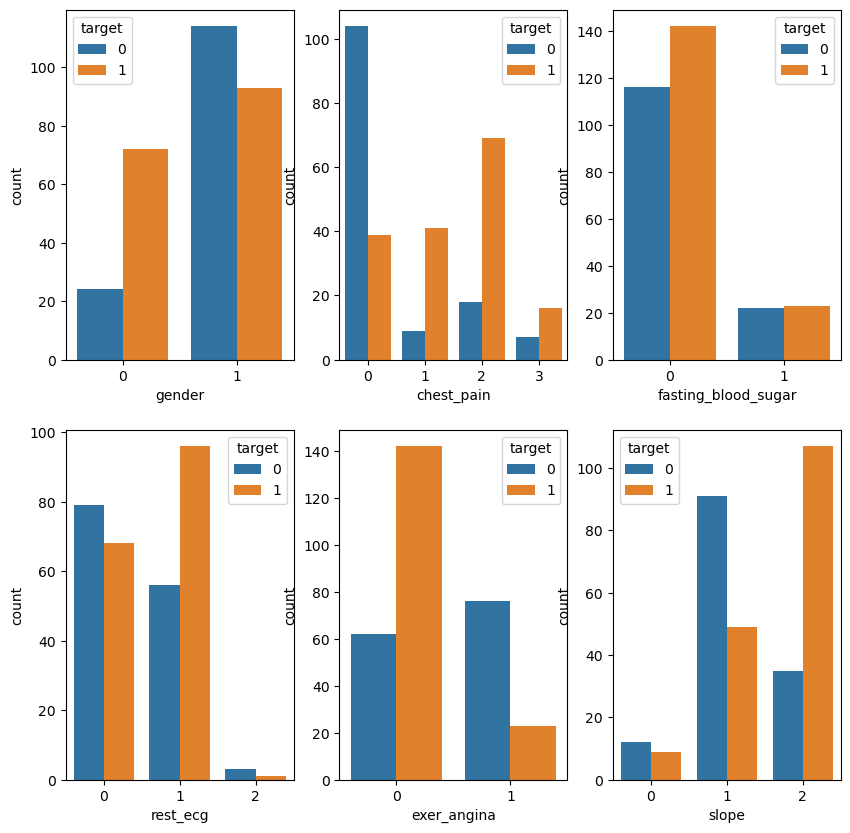

In [14]:
fig, ax = plt.subplots(2,3, figsize = (10,10))
sns.countplot(x = 'gender',hue = 'target', data=data, ax=ax[0][0])
sns.countplot(x = 'chest_pain',hue = 'target', data=data, ax=ax[0][1])
sns.countplot(x = 'fasting_blood_sugar',hue = 'target', data=data, ax=ax[0][2])
sns.countplot(x = 'rest_ecg',hue = 'target', data=data, ax=ax[1][0])
sns.countplot(x = 'exer_angina',hue = 'target', data=data, ax=ax[1][1])
sns.countplot(x = 'slope',hue = 'target', data=data, ax=ax[1][2])

From Above Insight in case of gender mostly male have more heart diseases as compared to female.Incase of chest_pain those have no pain are also safe from heart diseases and in those have also some pain is also chances of heart diseases. And those hace more pain have more chances to have also heart diseases.

### Handel the outliers

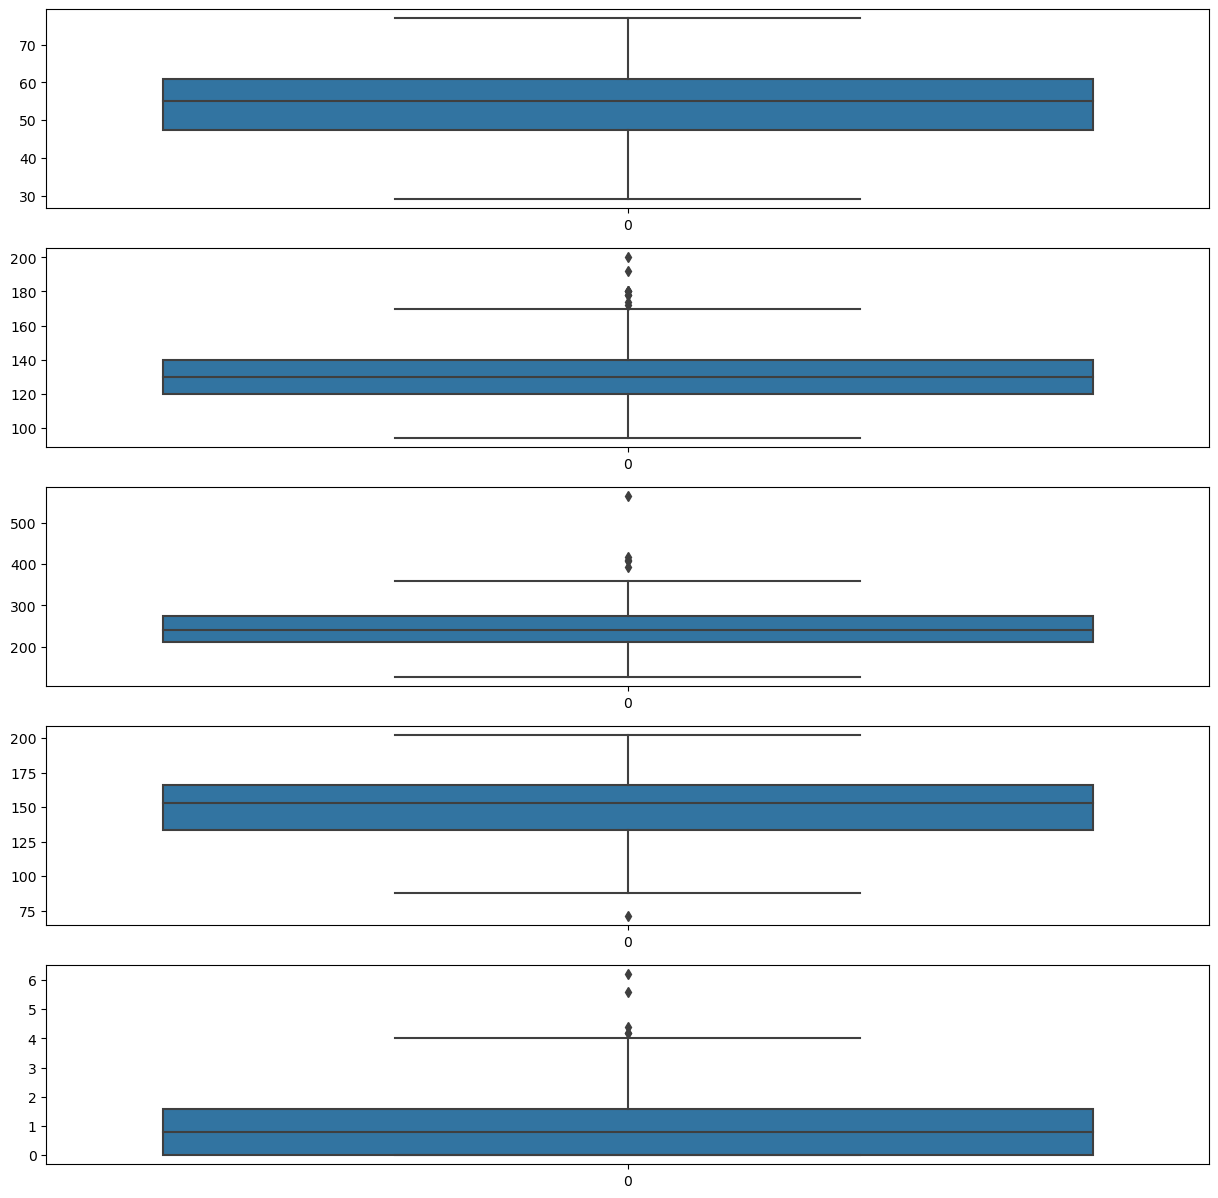

In [15]:
fig, axs = plt.subplots(5,1, figsize = (15,15))
plt1 = sns.boxplot(data['age'], ax=axs[0])
plt2 = sns.boxplot(data['rest_bps'], ax=axs[1])
plt3 = sns.boxplot(data['cholestrol'], ax=axs[2])
plt4 = sns.boxplot(data['thalach'], ax=axs[3])
plt4 = sns.boxplot(data['old_peak'], ax=axs[4])

In [16]:
###Feature selection

In [17]:
from sklearn.feature_selection import chi2
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [18]:
x1=data[['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina','slope', 'ca','thalassemia']]
y1=data[['target']]

In [19]:
score = chi2(x1,y1)
score

(array([ 7.57683451, 62.59809791,  0.20293368,  2.97827075, 38.91437697,
         9.8040952 , 66.44076512,  5.79185297]),
 array([5.91231763e-03, 2.53498179e-15, 6.52363208e-01, 8.43893904e-02,
        4.42807388e-10, 1.74123685e-03, 3.60567663e-16, 1.61006098e-02]))

In [20]:
p_values=pd.Series(score[1],index=x1.columns)
p_values

gender                 5.912318e-03
chest_pain             2.534982e-15
fasting_blood_sugar    6.523632e-01
rest_ecg               8.438939e-02
exer_angina            4.428074e-10
slope                  1.741237e-03
ca                     3.605677e-16
thalassemia            1.610061e-02
dtype: float64

In [21]:
irr_cols=[]
for x in p_values.index:
    if p_values[x]<=0.05:
        print(x,':- Reject the Null Hypothesis')
    else:
        print(x,':- Accept the Null Hypothesis')
        irr_cols.append(x)

gender :- Reject the Null Hypothesis
chest_pain :- Reject the Null Hypothesis
fasting_blood_sugar :- Accept the Null Hypothesis
rest_ecg :- Accept the Null Hypothesis
exer_angina :- Reject the Null Hypothesis
slope :- Reject the Null Hypothesis
ca :- Reject the Null Hypothesis
thalassemia :- Reject the Null Hypothesis


In [22]:
irr_cols

['fasting_blood_sugar', 'rest_ecg']

In [23]:
#drop all the irrelevant columns
data.drop(labels = irr_cols, axis = 1, inplace = True)
data

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,123,1,0.2,1,0,3,0
299,45,1,3,110,264,132,0,1.2,1,0,3,0
300,68,1,0,144,193,141,0,3.4,1,2,3,0
301,57,1,0,130,131,115,1,1.2,1,1,3,0


In [24]:
X = data.drop('target', axis = 1)
y = data['target'] 

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=56)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 11), (91, 11), (212,), (91,))

### Model buliding

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [40]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
pred = dt.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [43]:
print("Accuracy Score", accuracy_score(y_test, pred))
print("F1 Score", f1_score(y_test, pred))
print("AUC Score", roc_auc_score(y_test, pred))

Accuracy Score 0.7912087912087912
F1 Score 0.795698924731183
AUC Score 0.7910628019323671


<Axes: >

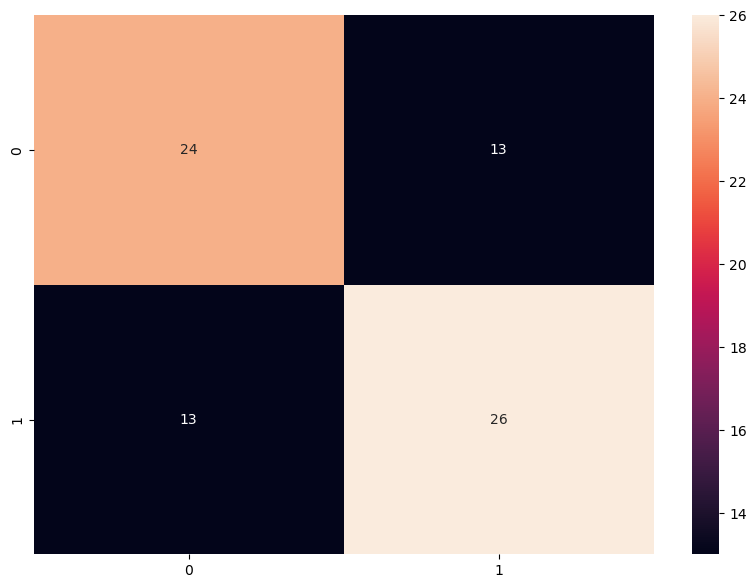

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, pred), annot = True)

### Hyper parameter Tunning 

In [33]:
dt_tune=DecisionTreeClassifier(criterion='entropy',max_depth=3, min_samples_split=10)

In [35]:
dt_tune.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

In [46]:
pred_t=dt_tune.predict(X_test)

In [47]:
print("Accuracy Score", accuracy_score(y_test, pred_t))
print("F1 Score", f1_score(y_test, pred_t))
print("AUC Score", roc_auc_score(y_test, pred_t))

Accuracy Score 0.8021978021978022
F1 Score 0.8043478260869565
AUC Score 0.8021739130434783


<Axes: >

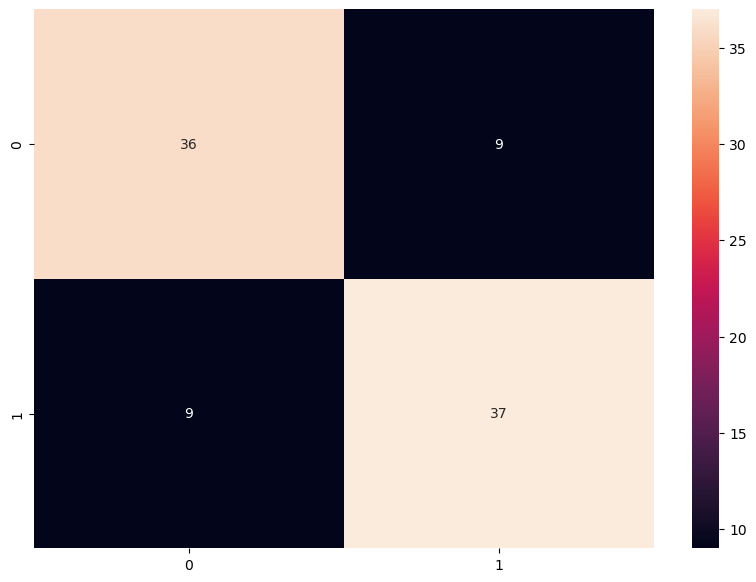

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, pred_t), annot = True)

 ## Conclusion 
*First, the AUC score of around 0.8021 means that the model is quite good at distinguishing between two different groups or classes, which is super important in the kind of problems we're solving.*

*Second, the accuracy score of about 0.8021 suggests that the model is right about 80% of the time when it makes predictions. That's pretty accurate!*

*Lastly, the F1 score of around 0.8043 shows that our model is not only accurate but also good at finding both the right answers and avoiding wrong ones.*

*Overall, our decision tree model is showing impressive performance and looks like a reliable tool for making decisions in situations where we have two options to choose from.*